# Final Project For BMI6106: Intro to Probability and Statistics 

## World Happiness 2015-2019

**Disclaimer:** I chose to work with Python 3 for this project because I feel more comfortable with this programming language for now and I think that I can do more complex analyses on the data than what I would be able to do in R.

I wanted to work with the World Happiness dataset for this project. The results are from the World Gallup poll. The question posed to participants is called Cantril's Ladder. It asks respondents to think of a ladder with the best possible life for them being a 10, and the worst possible life being a 0, and to rate their own lives on that scale. The scores are from nationally representative samples and use the Gallup weights to make the estimates representative.

The six factors listed in addition to the happiness score--economic production, social support, life expectancy, freedom, corruption, and generosity--contribute to life evaluations. They have no impact on the actual score of the country, but may explain why some countries rank higher than others. 

In [1]:
# import packages and setup 
import pandas as pd
import scipy as sc
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data
df2015 = pd.read_csv('2015.csv')
df2016 = pd.read_csv('2016.csv')
df2017 = pd.read_csv('2017.csv')
df2018 = pd.read_csv('2018.csv')
df2019 = pd.read_csv('2019.csv')
df2019

,Country,Region,Rank,Happiness Score,Economy,Family,Life Expectancy,Freedom,Generosity,Corruption
0,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...,...
146,Yemen,Middle East and Northern Africa,147,3.380,0.287,1.163,0.463,0.143,0.108,0.077
147,Rwanda,Sub-Saharan Africa,148,3.334,0.359,0.711,0.614,0.555,0.217,0.411
148,Tanzania,Sub-Saharan Africa,149,3.231,0.476,0.885,0.499,0.417,0.276,0.147
149,Afghanistan,Southern Asia,150,3.203,0.350,0.517,0.361,0.000,0.158,0.025


First things first: what are the top 5 happiest countries for each year?

In [3]:
dflist = [df2015, df2016, df2017, df2018, df2019]
years = ["2015", "2016", "2017", "2018", "2019"]
n = 0

for df in dflist:
    print("For " + years[n] + " the 5 happiest countries are:")
    print(df.loc[:, "Country":"Region"].head(5))
    print()
    n = n + 1

For 2015 the 5 happiest countries are:
       Country          Region
0  Switzerland  Western Europe
1      Iceland  Western Europe
2      Denmark  Western Europe
3       Norway  Western Europe
4       Canada   North America

For 2016 the 5 happiest countries are:
       Country          Region
0      Denmark  Western Europe
1  Switzerland  Western Europe
2      Iceland  Western Europe
3       Norway  Western Europe
4      Finland  Western Europe

For 2017 the 5 happiest countries are:
       Country          Region
0       Norway  Western Europe
1      Denmark  Western Europe
2      Iceland  Western Europe
3  Switzerland  Western Europe
4      Finland  Western Europe

For 2018 the 5 happiest countries are:
       Country          Region
0      Finland  Western Europe
1       Norway  Western Europe
2      Denmark  Western Europe
3      Iceland  Western Europe
4  Switzerland  Western Europe

For 2019 the 5 happiest countries are:
       Country          Region
0      Finland  Western Eu

Okay, seems like we are seeing a pattern--Western Europe (especially Scandinavia) is where it's at, apparently! How about the least happy countries?

In [4]:
dflist = [df2015, df2016, df2017, df2018, df2019]
years = ["2015", "2016", "2017", "2018", "2019"]
n = 0

for df in dflist:
    print("For " + years[n] + " the 5 least happy countries are:")
    print(df.loc[:, "Country":"Region"].tail(5))
    print()
    n = n + 1

For 2015 the 5 least happy countries are:
     Country                           Region
147   Rwanda               Sub-Saharan Africa
148    Benin               Sub-Saharan Africa
149    Syria  Middle East and Northern Africa
150  Burundi               Sub-Saharan Africa
151     Togo               Sub-Saharan Africa

For 2016 the 5 least happy countries are:
         Country                           Region
146        Benin               Sub-Saharan Africa
147  Afghanistan                    Southern Asia
148         Togo               Sub-Saharan Africa
149        Syria  Middle East and Northern Africa
150      Burundi               Sub-Saharan Africa

For 2017 the 5 least happy countries are:
                      Country                           Region
146                    Rwanda               Sub-Saharan Africa
147                     Syria  Middle East and Northern Africa
148                  Tanzania               Sub-Saharan Africa
149                   Burundi               

Slightly more variation here, but still seeing a pattern...<br><br>
Let's explore how the different factors relate to happiness. 

### Life Expectancy and Happiness

Year: 2015


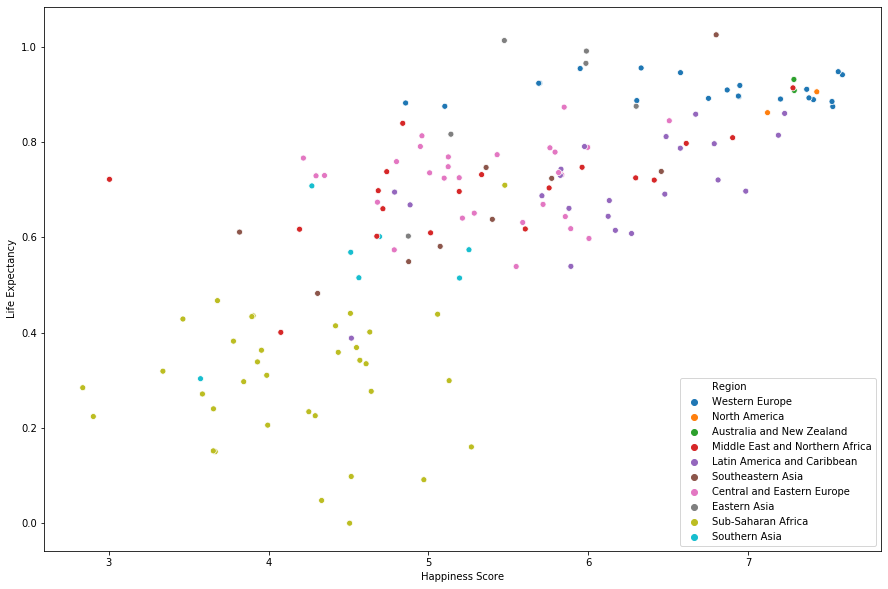


Year: 2016


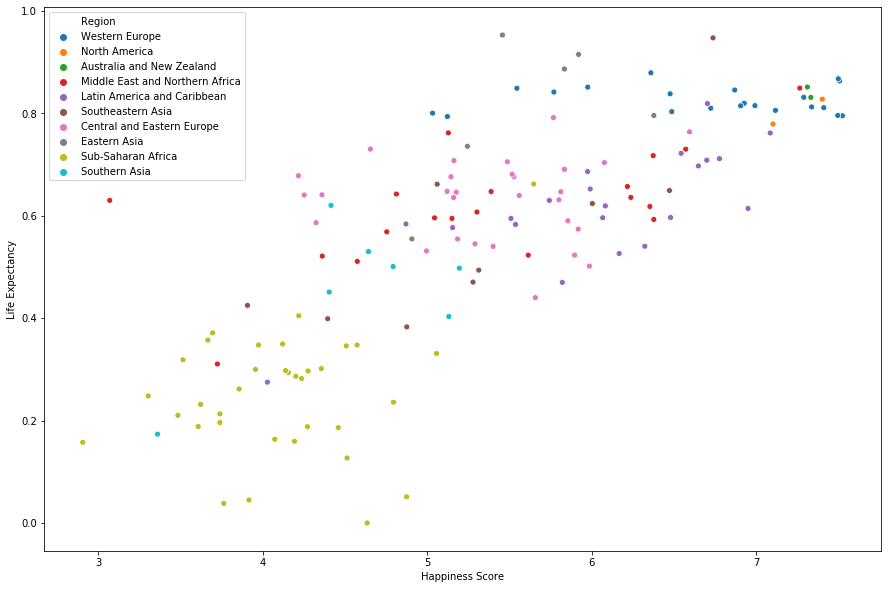


Year: 2017


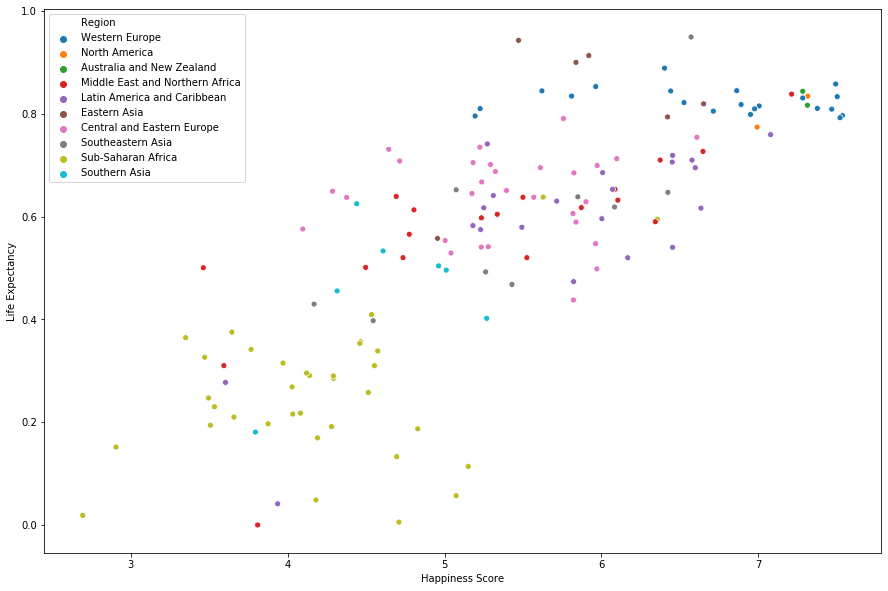


Year: 2018


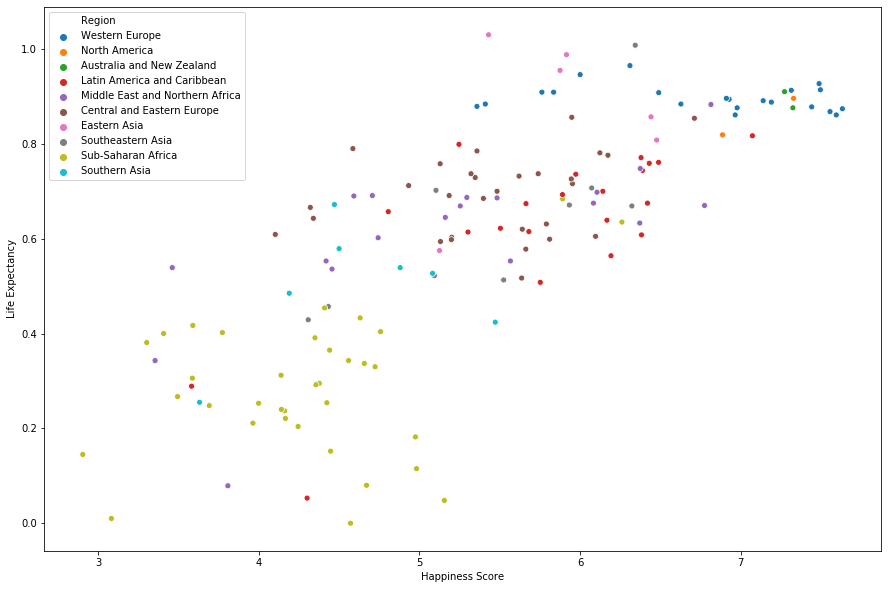


Year: 2019


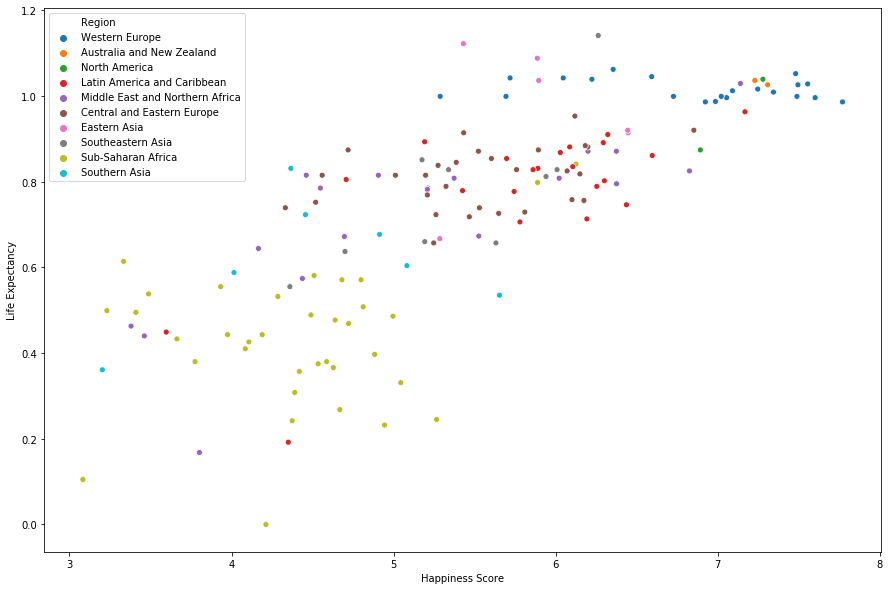

In [5]:
year = 2015
for df in dflist:
    print("Year: " + str(year))
    year = year+1
    plt.figure(figsize=(15,10))
    sns.scatterplot(x = df["Happiness Score"], y = df["Life Expectancy"], hue = df["Region"], legend = "brief")
    plt.show()
    print()


### Corruption and Happiness

Year: 2015


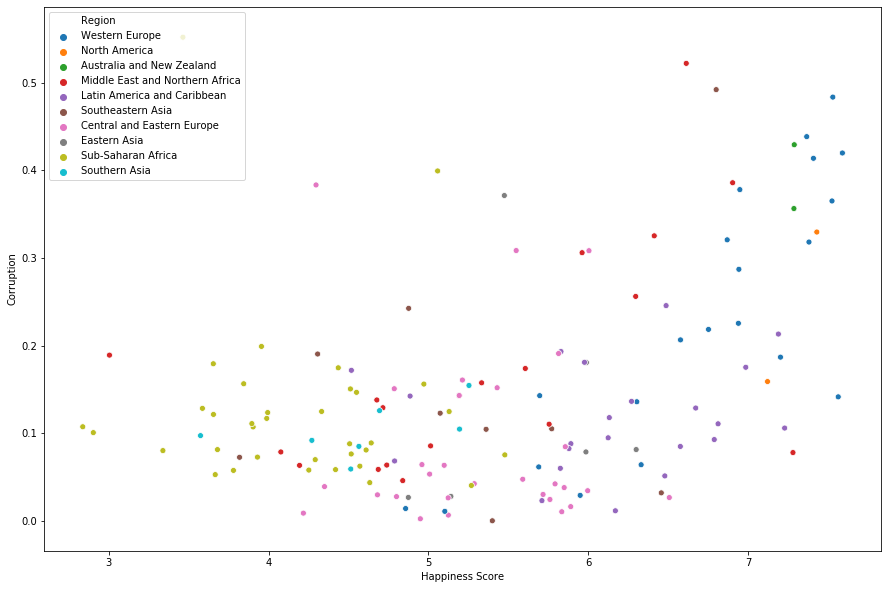


Year: 2016


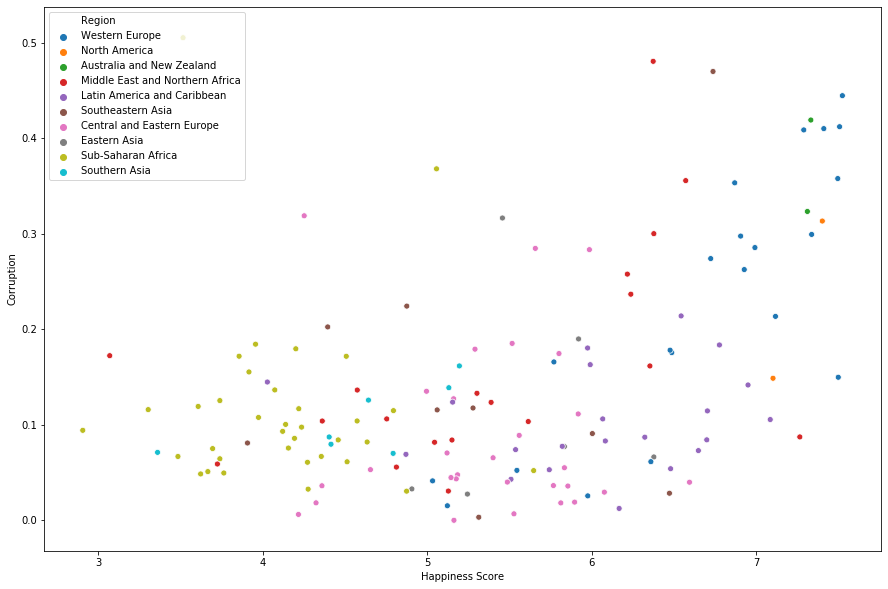


Year: 2017


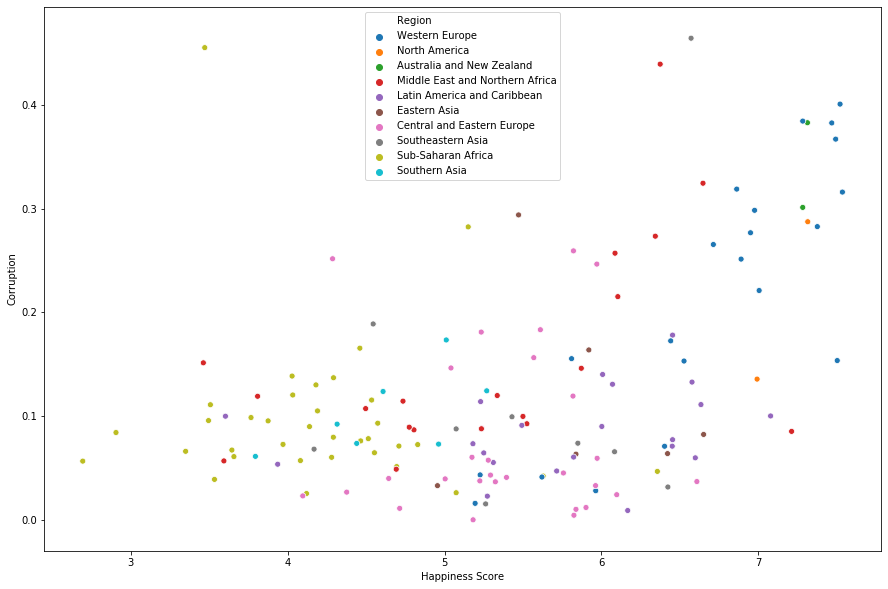


Year: 2018


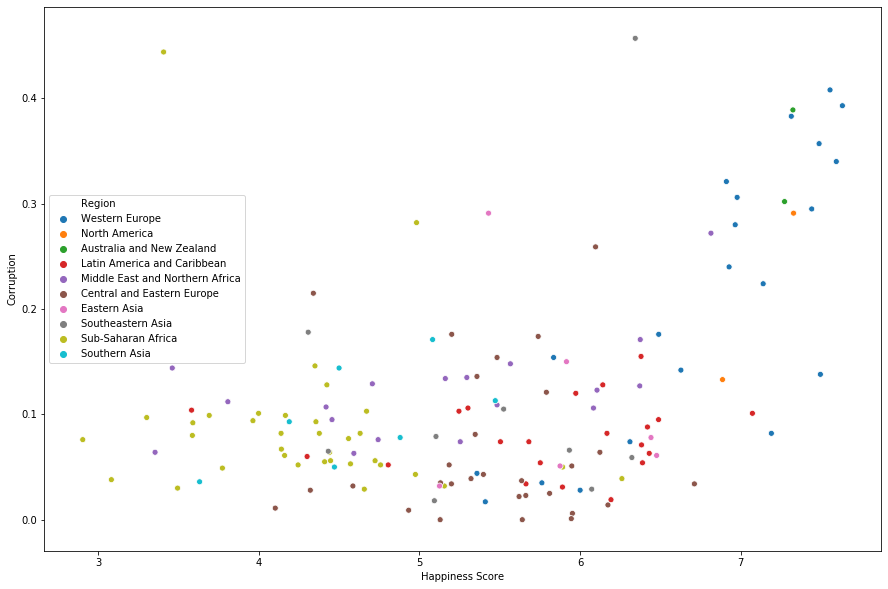


Year: 2019


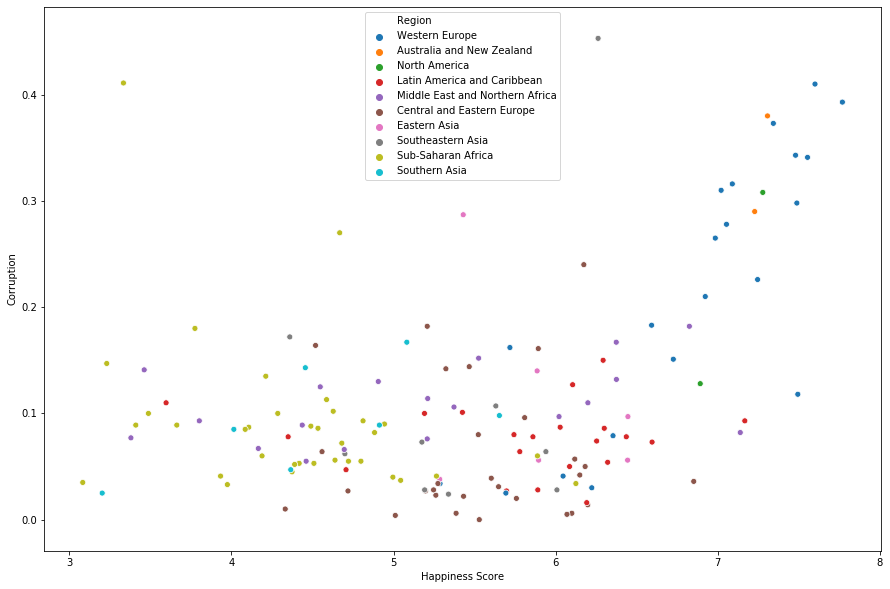

In [6]:
year = 2015
for df in dflist:
    print("Year: " + str(year))
    year = year+1
    plt.figure(figsize=(15,10))
    sns.scatterplot(x = df["Happiness Score"], y = df["Corruption"], hue = df["Region"], legend = "brief")
    plt.show()
    print()

### Economy and Happiness

Year: 2015


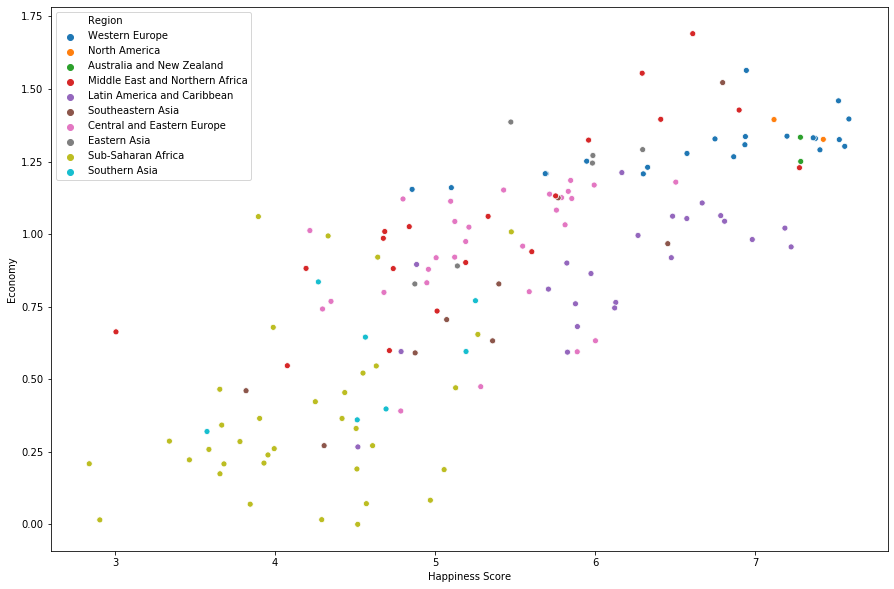


Year: 2016


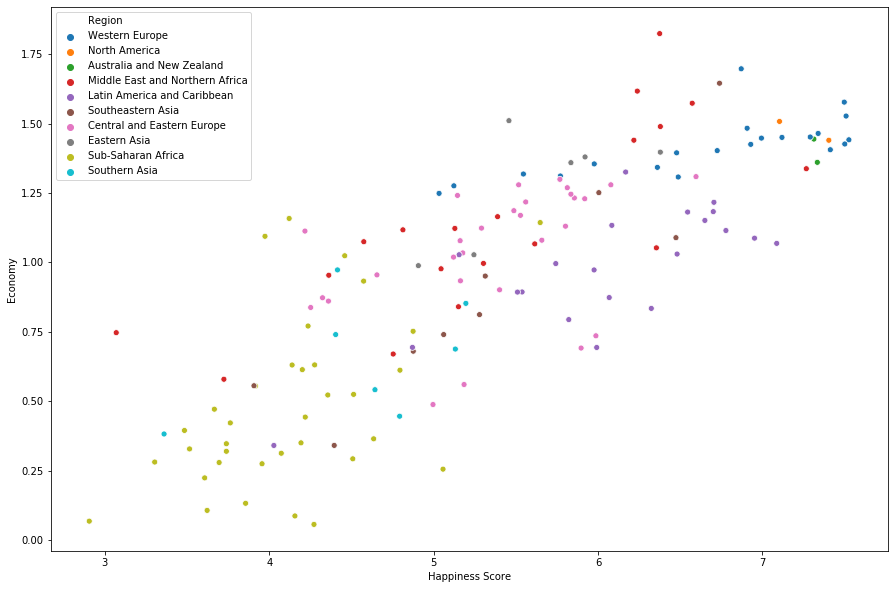


Year: 2017


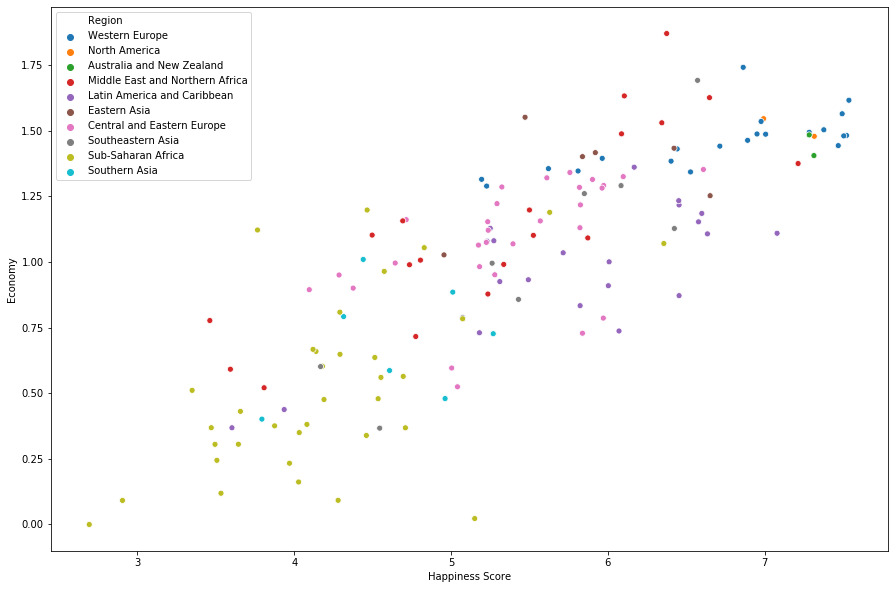


Year: 2018


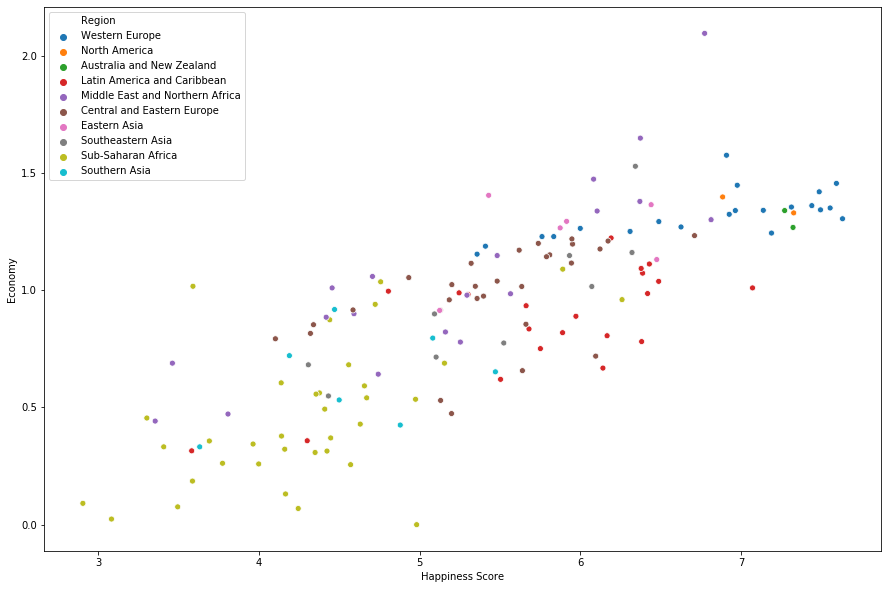


Year: 2019


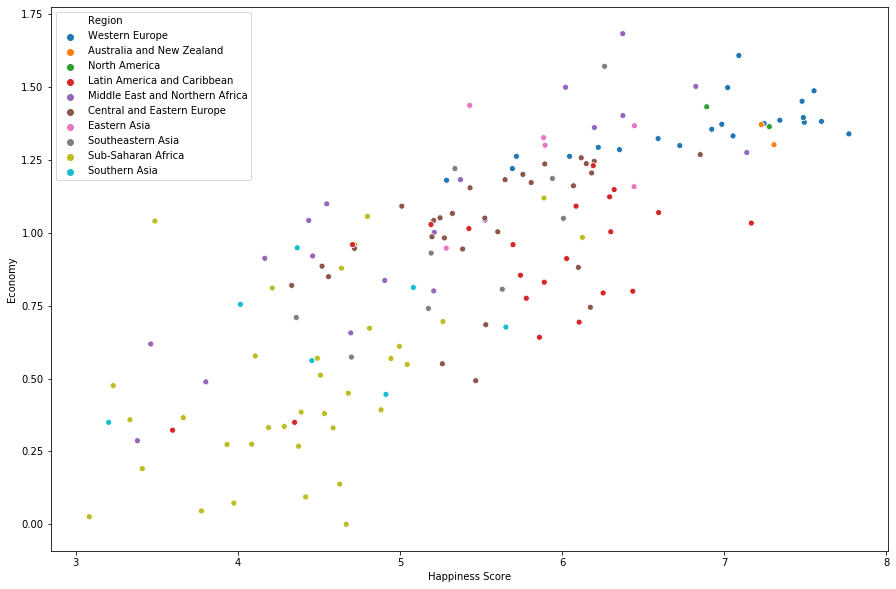

In [7]:
year = 2015
for df in dflist:
    print("Year: " + str(year))
    year = year+1
    plt.figure(figsize=(15,10))
    sns.scatterplot(x = df["Happiness Score"], y = df["Economy"], hue = df["Region"], legend = "brief")
    plt.show()
    print()


### Happiness through the years

Let's follow a few countries' happiness through the years. 

In [11]:
df19 = df2019[["Country","Happiness Score"]]
df18 = df2018[["Country","Happiness Score"]]
df17 = df2017[["Country","Happiness Score"]]
df16 = df2016[["Country","Happiness Score"]]
df15 = df2015[["Country","Happiness Score"]]
df15

,Country,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427
...,...,...
147,Rwanda,3.465
148,Benin,3.340
149,Syria,3.006
150,Burundi,2.905
